# In this note book:
- I define three different models to classify objects in cifar-10 dataset. (Deep neural net , Keras tuned model, and wide and deep model)
- In the last section these model's performance assessed by accuracy, f1 score and, Roc-auc metrics.
- last confusion matrix illustrated for all these three models.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# normalizing the data
x_train = x_train/255
x_test = x_test/255

In [3]:
x_train.min(), x_train.max()


(0.0, 1.0)

In [4]:
x_test.min(), x_test.max()

(0.0, 1.0)

In [5]:
# so each label is an integer ranging from 0 to 9 for each class of subjects.
y_train[0]

array([6], dtype=uint8)

# since in this dataset's labels showed by an integer:
 - we use SparseCategoricalCrossentropy as our model's Loss
 - Next step we asked to change the Loss of model to CategoricalCrossEntropy
 - so we should change our target labels from integer labels to one-hot encoded labels.

In [6]:
from tensorflow.keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [8]:
# Allocate 15% of the data to the test set and make validation dataset.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)



# Print the dimensions of the data
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)
print('x_val shape:' , x_val.shape)
print('y_val shape:', y_val.shape)

x_train shape: (42500, 32, 32, 3)
y_train shape: (42500, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)
x_val shape: (7500, 32, 32, 3)
y_val shape: (7500, 10)


In [9]:
len(y_train[0])   #length is 10 because for ten classes we used one-hot encoded method.

10

In [10]:
print(y_train[8])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


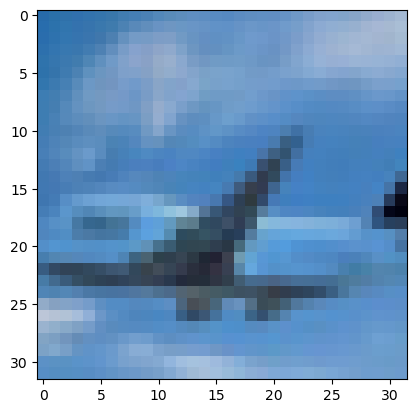

In [11]:
# viiizzzzhhh
plt.imshow(x_train[0])

# Define Deep Neural Network model


In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[32, 32, 3]),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 256)               16640     
                                                                 
 dense_5 (Dense)             (None, 10)                2

# compile model

In [14]:
from keras.optimizers import SGD

model.compile(loss="categorical_crossentropy",
              optimizer=SGD(learning_rate=0.001),
              metrics=["accuracy"])

# Fit model

In [15]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))


Epoch 1/50
1329/1329 [==============================] - 8s 4ms/step - loss: 2.2924 - accuracy: 0.1492 - val_loss: 2.2736 - val_accuracy: 0.1865
Epoch 2/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.2273 - accuracy: 0.1872 - val_loss: 2.1681 - val_accuracy: 0.1863
Epoch 3/50
1329/1329 [==============================] - 5s 4ms/step - loss: 2.1073 - accuracy: 0.2042 - val_loss: 2.0705 - val_accuracy: 0.2172
Epoch 4/50
1329/1329 [==============================] - 9s 7ms/step - loss: 2.0370 - accuracy: 0.2368 - val_loss: 2.0196 - val_accuracy: 0.2489
Epoch 5/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.9917 - accuracy: 0.2650 - val_loss: 1.9785 - val_accuracy: 0.2672
Epoch 6/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.9472 - accuracy: 0.2877 - val_loss: 1.9309 - val_accuracy: 0.2940
Epoch 7/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.9039 - accuracy: 0.3139 - val_loss: 1.8900 - val_accuracy:

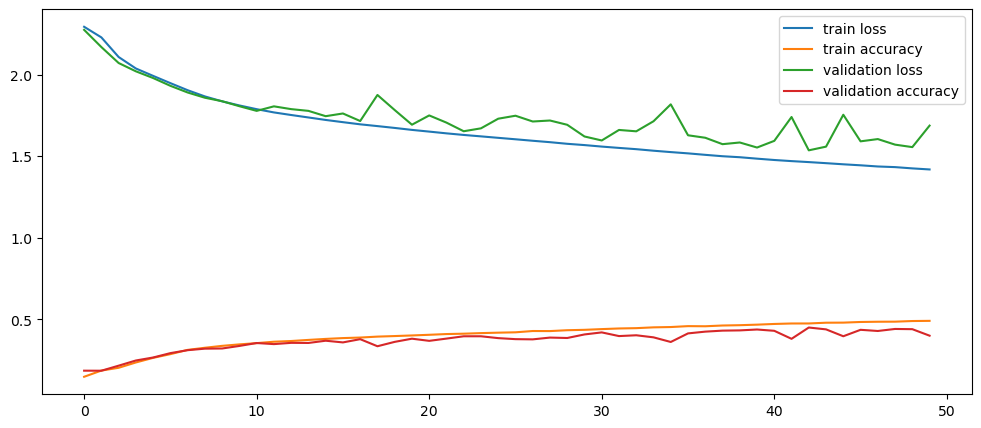

In [16]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [17]:
# Predict class labels for the all datasets (train validation and test)
M1_test_y_pred = model.predict(x_test)
M1_train_y_pred = model.predict(x_train)
M1_val_y_pred = model.predict(x_val)

# Convert probabilities for the predictions to class labels               
M1_test_pred = np.argmax(M1_test_y_pred, axis=1)
M1_train_pred = np.argmax(M1_train_y_pred, axis=1)
M1_val_pred = np.argmax(M1_val_y_pred, axis=1)

# convert one-hot encoded labels to integer.
M1_y_testing = np.argmax(y_test, axis=1)
M1_y_training = np.argmax(y_train, axis=1)
M1_y_validation = np.argmax(y_val, axis=1)

235/235 [==============================] - 1s 3ms/step


In [18]:
# test_pred[0]
M1_y_testing[4]

6

In [19]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
M1_conf_matrix = confusion_matrix(M1_y_testing, M1_test_pred)

# Second model : "keras Tuner" fine tunes the hyperparameters.

In [21]:
import keras_tuner

# defining search space

In [22]:
# we define our model in advance, note that the next class will determine the optimum number of Dense layers.

# note: for later projects you can try divide dense layers to tow parts. firs units can have more neurons than the last ones, 
# or you can just have this code and try higher "max_trials".

# this search could be much better if limit strictly some variable such as the number of neurons in specific layers!

def call_existing_code(units, activation, dropout, lr):
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(layers.Dense(units=units, activation=activation))
    if dropout:
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 3, 5)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=64, max_value=128, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(10, activation="softmax"))
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


build_model(keras_tuner.HyperParameters())

# start the search
- max_trials: The total number of trials to run during the search.
- executions_per_trial: The number of models that should be built and fit for each trial. Different trials have different hyperparameter values. The executions within the same trial have the same hyperparameter values. The purpose of having multiple executions per trial is to reduce results variance and therefore be able to more accurately assess the performance of a model. If you want to get results faster, you could set executions_per_trial=1 (single round of training for each model configuration).
- overwrite: Control whether to overwrite the previous results in the same directory or resume the previous search instead. Here we set overwrite=True to start a new search and ignore any previous results.
- directory: A path to a directory for storing the search results.
- project_name: The name of the sub-directory in the directory.

In [23]:
# for getting the address of your directory run the following code.
import os

cwd = os.getcwd()
print(cwd)


D:\video-learning\maktabkhoneh\tf_keras


In [24]:
# there are many possible cmbination of defined hyperparameters.RandomSearch do this randomely for defined number of max_trials.
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=20,
    executions_per_trial=1,
    overwrite=True,
    directory=r"D:\video-learning\maktabkhoneh\tf_keras",
    project_name="suggested_models_cifar10"
)

In [25]:
# it shows the search space summary
tuner.search_space_summary()

Search space summary
Default search space size: 7
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [26]:
# now statrt the search to find the best hyperparameters.
# notice how this cell is running based on the number of "max_trials" and "execution per trial" you defined above.

tuner.search(x_train, y_train, epochs=3, validation_data=(x_val, y_val))

Trial 20 Complete [00h 00m 22s]
val_accuracy: 0.34146666526794434

Best val_accuracy So Far: 0.4339999854564667
Total elapsed time: 00h 07m 52s
INFO:tensorflow:Oracle triggered exit


In [27]:
# shows 10 best models
tuner.results_summary()

Results summary
Results in D:\video-learning\maktabkhoneh\tf_keras\suggested_models_cifar10
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 03 summary
Hyperparameters:
num_layers: 4
units_0: 64
activation: tanh
units_1: 128
units_2: 128
dropout: False
lr: 0.00014452530326223846
units_3: 64
units_4: 128
Score: 0.4339999854564667

Trial 10 summary
Hyperparameters:
num_layers: 3
units_0: 64
activation: relu
units_1: 128
units_2: 128
dropout: False
lr: 0.00037880942111362035
units_3: 128
units_4: 96
Score: 0.4230666756629944

Trial 00 summary
Hyperparameters:
num_layers: 3
units_0: 96
activation: tanh
units_1: 96
units_2: 128
dropout: False
lr: 0.0001578641743310332
Score: 0.4222666621208191

Trial 17 summary
Hyperparameters:
num_layers: 4
units_0: 128
activation: relu
units_1: 128
units_2: 64
dropout: False
lr: 0.0010509199655136681
units_3: 128
units_4: 96
Score: 0.4174666702747345

Trial 12 summary
Hyperparameters:
num_layers: 4
units_0: 128
activation: rel

In [28]:
# Get the top 5 models.
models = tuner.get_best_models(num_models=5)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(None, 32, 32, 3))   # None indicates the batch-size!
best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 230,410
Trainable params: 230,410
Non-trai

In [29]:
# Get the top 5 hyperparameters.
best_hps = tuner.get_best_hyperparameters(5)
# Build the model with the best hp.
model_1 = build_model(best_hps[2])
# Fit with the entire dataset.
history_1 = model_1.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))


Epoch 1/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.8457 - accuracy: 0.3406 - val_loss: 1.7307 - val_accuracy: 0.3815
Epoch 2/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.6764 - accuracy: 0.4035 - val_loss: 1.6551 - val_accuracy: 0.4121
Epoch 3/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.6020 - accuracy: 0.4296 - val_loss: 1.6201 - val_accuracy: 0.4172
Epoch 4/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.5513 - accuracy: 0.4484 - val_loss: 1.5668 - val_accuracy: 0.4351
Epoch 5/50
1329/1329 [==============================] - 5s 4ms/step - loss: 1.5063 - accuracy: 0.4650 - val_loss: 1.5432 - val_accuracy: 0.4515
Epoch 6/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.4757 - accuracy: 0.4743 - val_loss: 1.5152 - val_accuracy: 0.4624
Epoch 7/50
1329/1329 [==============================] - 6s 4ms/step - loss: 1.4451 - accuracy: 0.4852 - val_loss: 1.5046 - val_accuracy:

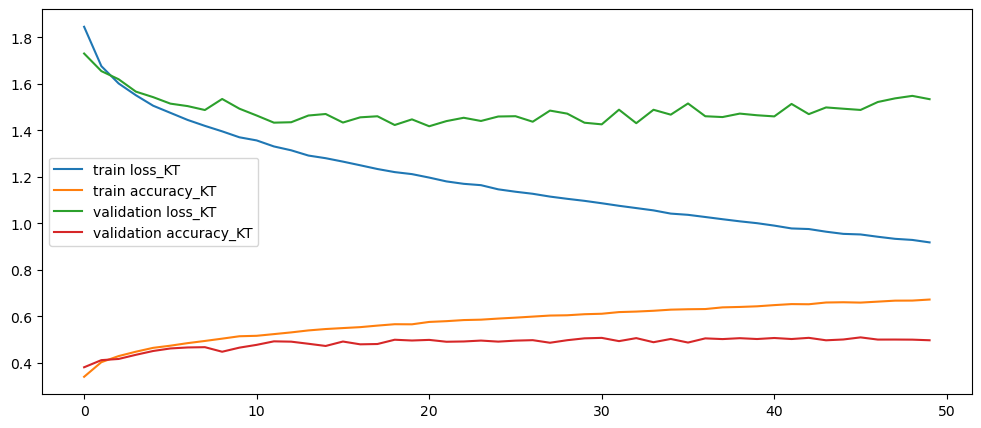

In [30]:
# I named the labels with prefix "TK" to show that their parameters chosen by Keras_Tuner.
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_1.history["loss"], label="train loss_KT")
ax.plot(history_1.history["accuracy"], label="train accuracy_KT")
ax.plot(history_1.history["val_loss"], label="validation loss_KT")
ax.plot(history_1.history["val_accuracy"], label="validation accuracy_KT")
ax.legend()

In [31]:
# Predict class labels for the all datasets (train validation and test)
test_y_pred_KT = model_1.predict(x_test)
train_y_pred_KT = model_1.predict(x_train)
val_y_pred_KT = model_1.predict(x_val)

# Convert probabilities for the predictions to class labels               
M2_test_pred_KT = np.argmax(test_y_pred_KT, axis=1)
M2_train_pred_KT = np.argmax(train_y_pred_KT, axis=1)
M2_val_pred_KT = np.argmax(val_y_pred_KT, axis=1)

# convert one-hot encoded labels to integer.
M2_y_testing = np.argmax(y_test, axis=1)
M2_y_training = np.argmax(y_train, axis=1)
M2_y_validation = np.argmax(y_val, axis=1)

235/235 [==============================] - 1s 4ms/step


In [32]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
M2_conf_matrix_KT = confusion_matrix(M2_y_testing, M2_test_pred_KT)

# Third Model: Wide and Deep
- we will gonna make a wide and deep model to classify Cifar-10 objects.
- then we use mtrics to evaluate the wide and deep model's performance.

In [34]:
# Define the wide and deep model
def create_model():
    # Input layer
    input_layer = keras.Input(shape=(32, 32, 3))
    flatten = keras.layers.Flatten()(input_layer)

    # Wide component
    wide = keras.layers.Dense(512, activation='relu')(flatten)

    # Deep component
    deep = keras.layers.Dense(256, activation='relu')(flatten)
    deep = keras.layers.Dense(128, activation='relu')(deep)
    deep = keras.layers.Dense(64, activation='relu')(deep)
    deep = keras.layers.Dense(32, activation='relu')(deep)
    deep = keras.layers.Dense(16, activation='relu')(deep)

    # Concatenate wide and deep components
    combined = keras.layers.concatenate([wide, deep])

    # Output layer
    output = keras.layers.Dense(10, activation='softmax')(combined)

    model = keras.Model(inputs=input_layer, outputs=output)
    return model

# Create the wide and deep model
model = create_model()

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_WD= model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_val,y_val))

Epoch 1/50
333/333 [==============================] - 12s 30ms/step - loss: 1.9694 - accuracy: 0.3169 - val_loss: 1.8099 - val_accuracy: 0.3487
Epoch 2/50
333/333 [==============================] - 9s 28ms/step - loss: 1.7456 - accuracy: 0.3837 - val_loss: 1.7178 - val_accuracy: 0.3924
Epoch 3/50
333/333 [==============================] - 10s 30ms/step - loss: 1.6642 - accuracy: 0.4134 - val_loss: 1.7192 - val_accuracy: 0.3843
Epoch 4/50
333/333 [==============================] - 10s 28ms/step - loss: 1.6132 - accuracy: 0.4311 - val_loss: 1.6738 - val_accuracy: 0.4016
Epoch 5/50
333/333 [==============================] - 9s 28ms/step - loss: 1.5749 - accuracy: 0.4469 - val_loss: 1.6151 - val_accuracy: 0.4259
Epoch 6/50
333/333 [==============================] - 9s 28ms/step - loss: 1.5411 - accuracy: 0.4591 - val_loss: 1.6060 - val_accuracy: 0.4303
Epoch 7/50
333/333 [==============================] - 10s 29ms/step - loss: 1.5160 - accuracy: 0.4639 - val_loss: 1.6089 - val_accuracy: 0.

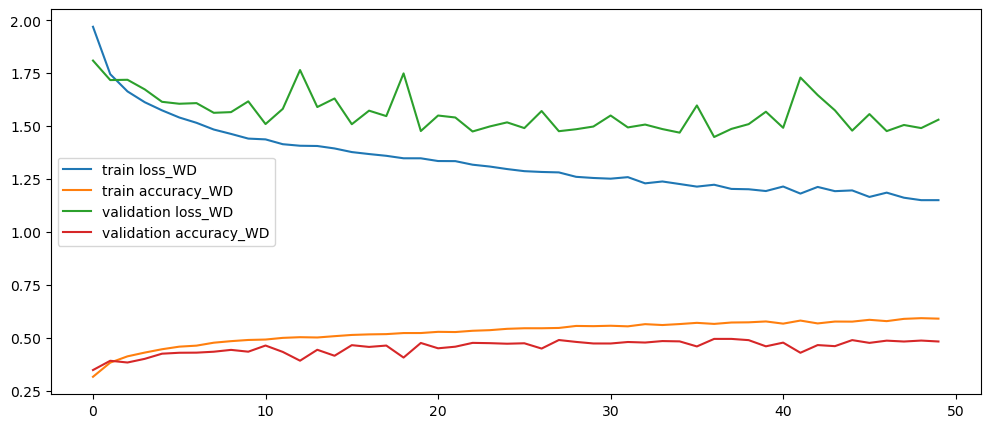

In [35]:
# I named the labels with prefix "TK" to show that their parameters chosen by Keras_Tuner.
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history_WD.history["loss"], label="train loss_WD")
ax.plot(history_WD.history["accuracy"], label="train accuracy_WD")
ax.plot(history_WD.history["val_loss"], label="validation loss_WD")
ax.plot(history_WD.history["val_accuracy"], label="validation accuracy_WD")
ax.legend()

In [36]:
# Predict class labels for the all datasets (train validation and test)
M3_test_y_pred_WD = model.predict(x_test)
M3_train_y_pred_WD = model.predict(x_train)
M3_val_y_pred_WD = model.predict(x_val)

# Convert probabilities for the predictions to class labels               
M3_test_pred_WD = np.argmax(M3_test_y_pred_WD, axis=1)
M3_train_pred_WD = np.argmax(M3_train_y_pred_WD, axis=1)
M3_val_pred_WD = np.argmax(M3_val_y_pred_WD, axis=1)

# convert one-hot encoded labels to integer.
M3_y_testing = np.argmax(y_test, axis=1)
M3_y_training = np.argmax(y_train, axis=1)
M3_y_validation = np.argmax(y_val, axis=1)

235/235 [==============================] - 1s 5ms/step


In [37]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
M3_conf_matrix_WD = confusion_matrix(M3_y_testing, M3_test_pred_WD)

# Models assessment:
- models assessed by f1-score , accuracy, and Roc-Auc metrics
- confusion matrix also plotted for each of the models.

In [40]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score

# Define the metrics for the first model
M1_train_acc = accuracy_score(M1_y_training, M1_train_pred)
M1_train_f1 = f1_score(M1_y_training, M1_train_pred, average='weighted')
M1_test_acc = accuracy_score(M1_y_testing, M1_test_pred)
M1_test_f1 = f1_score(M1_y_testing, M1_test_pred, average='weighted')
M1_val_acc = accuracy_score(M1_y_validation, M1_val_pred)
M1_val_f1 = f1_score(M1_y_validation, M1_val_pred, average='weighted')

M1_train_roc_auc = roc_auc_score(M1_y_training, M1_train_y_pred, multi_class='ovr')
M1_val_roc_auc = roc_auc_score(M1_y_validation, M1_val_y_pred, multi_class='ovr')
M1_test_roc_auc = roc_auc_score(M1_y_testing, M1_test_y_pred, multi_class='ovr')

# Define the metrics for the second model (Keras Tuned)
M2_train_acc_KT = accuracy_score(M2_y_training, M2_train_pred_KT)
M2_train_f1_KT = f1_score(M2_y_training, M2_train_pred_KT, average='weighted')
M2_test_acc_KT = accuracy_score(M2_y_testing, M2_test_pred_KT)
M2_test_f1_KT = f1_score(M2_y_testing, M2_test_pred_KT, average='weighted')
M2_val_acc_KT = accuracy_score(M2_y_validation, M2_val_pred_KT)
M2_val_f1_KT = f1_score(M2_y_validation, M2_val_pred_KT, average='weighted')


M2_train_roc_auc_KT = roc_auc_score(M2_y_training, train_y_pred_KT, multi_class='ovr')
M2_val_roc_auc_KT = roc_auc_score(M2_y_validation, val_y_pred_KT, multi_class='ovr')
M2_test_roc_auc_KT = roc_auc_score(M2_y_testing, test_y_pred_KT, multi_class='ovr')

# Define the metrics for the third model (Wide and deep model)

M3_train_acc_WD = accuracy_score(M3_y_training, M3_train_pred_WD)
M3_train_f1_WD = f1_score(M3_y_training, M3_train_pred_WD, average='weighted')
M3_test_acc_WD = accuracy_score(M3_y_testing, M3_test_pred_WD)
M3_test_f1_WD = f1_score(M3_y_testing, M3_test_pred_WD, average='weighted')
M3_val_acc_WD = accuracy_score(M3_y_validation, M3_val_pred_WD)
M3_val_f1_WD = f1_score(M3_y_validation, M3_val_pred_WD, average='weighted')

M3_train_roc_auc_WD = roc_auc_score(M3_y_training, M3_train_y_pred_WD, multi_class='ovr')
M3_val_roc_auc_WD = roc_auc_score(M3_y_validation, M3_val_y_pred_WD, multi_class='ovr')
M3_test_roc_auc_WD = roc_auc_score(M3_y_testing, M3_test_y_pred_WD, multi_class='ovr')





# Create a pandas dataframe to display the metrics for both models
data = {
    'Model': ['Model_01 ', 'Model_02(Keras Tuned)', 'Model_03(Wide and Deep)'],
    
    'Train Accuracy': [M1_train_acc, M2_train_acc_KT, M3_train_acc_WD],
    'Train F1': [M1_train_f1, M2_train_f1_KT, M3_train_f1_WD],
    'Train Roc Auc': [M1_train_roc_auc, M2_train_roc_auc_KT, M3_train_roc_auc_WD],
    
    'Validation Accuracy': [M1_val_acc, M2_val_acc_KT, M3_val_acc_WD],
    'Validation F1': [M1_val_f1, M2_val_f1_KT, M3_val_f1_WD ],
    'Validation Roc Auc': [M1_val_roc_auc, M2_val_roc_auc_KT, M3_val_roc_auc_WD],
    
    'Test Accuracy': [M1_test_acc, M2_test_acc_KT, M3_test_acc_WD],
    'Test F1': [M1_test_f1, M2_test_f1_KT, M3_test_f1_WD],
    'Test Roc Auc': [M1_test_roc_auc, M2_test_roc_auc_KT, M3_test_roc_auc_WD]
    
}

df = pd.DataFrame(data)
df.set_index('Model', inplace=True)

# Display the table
df


,Train Accuracy,Train F1,Train Roc Auc,Validation Accuracy,Validation F1,Validation Roc Auc,Test Accuracy,Test F1,Test Roc Auc
Model,,,,,,,,,
Model_01,0.430541,0.412824,0.871344,0.400800,0.383383,0.854513,0.4132,0.393978,0.858784
Model_02(Keras Tuned),0.677106,0.677120,0.953007,0.497600,0.496901,0.882506,0.5022,0.502131,0.885436
Model_03(Wide and Deep),0.582988,0.576308,0.923650,0.483467,0.474961,0.878172,0.4856,0.477103,0.878672


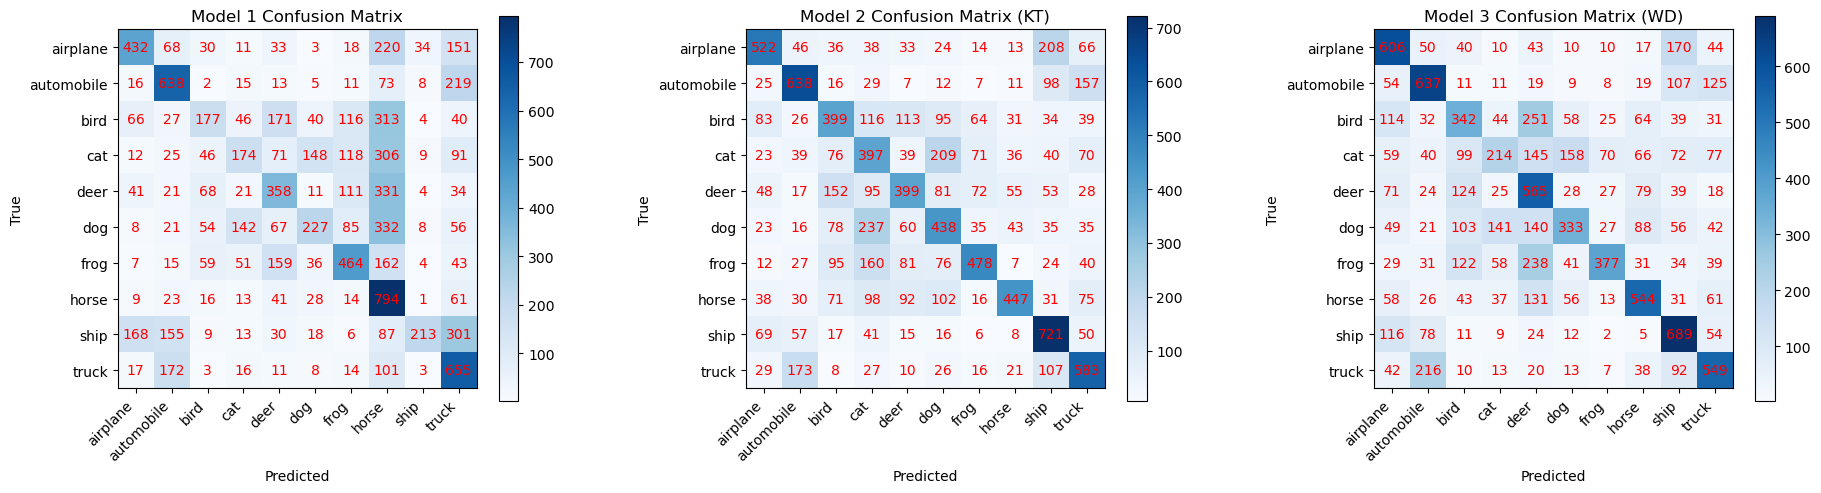

In [56]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrices
fig, axs = plt.subplots(1, 3, figsize=(22, 5))  # Create a figure with three subplots

# Subplot 1 - M1_conf_matrix
im1 = axs[0].imshow(M1_conf_matrix, cmap=plt.cm.Blues)
axs[0].set_xticks(np.arange(len(class_names)))
axs[0].set_yticks(np.arange(len(class_names)))
axs[0].set_xticklabels(class_names ,rotation=45, ha="right")
axs[0].set_yticklabels(class_names)
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('True')
axs[0].set_title("Model 1 Confusion Matrix")

# Loop over data dimensions and create text annotation for each cell
for i in range(len(class_names)):
    for j in range(len(class_names)):
        axs[0].text(j, i, M1_conf_matrix[i, j], ha="center", va="center", color="r")

# Subplot 2 - M2_conf_matrix
im2 = axs[1].imshow(M2_conf_matrix_KT, cmap=plt.cm.Blues)
axs[1].set_xticks(np.arange(len(class_names)))
axs[1].set_yticks(np.arange(len(class_names)))
axs[1].set_xticklabels(class_names ,rotation=45, ha="right")
axs[1].set_yticklabels(class_names)
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('True')
axs[1].set_title("Model 2 Confusion Matrix (KT)")

# Loop over data dimensions and create text annotation for each cell
for i in range(len(class_names)):
    for j in range(len(class_names)):
        axs[1].text(j, i, M2_conf_matrix_KT[i, j], ha="center", va="center", color="r")

# Subplot 3 - M3_conf_matrix
im3 = axs[2].imshow(M3_conf_matrix_WD, cmap=plt.cm.Blues)
axs[2].set_xticks(np.arange(len(class_names)))
axs[2].set_yticks(np.arange(len(class_names)))
axs[2].set_xticklabels(class_names, rotation=45, ha="right")
axs[2].set_yticklabels(class_names)
axs[2].set_xlabel('Predicted')
axs[2].set_ylabel('True')
axs[2].set_title("Model 3 Confusion Matrix (WD)")

# Loop over data dimensions and create text annotation for each cell
for i in range(len(class_names)):
    for j in range(len(class_names)):
        axs[2].text(j, i, M3_conf_matrix_WD[i, j], ha="center", va="center", color="r")

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Add colorbars for better visualization
cbar1 = fig.colorbar(im1, ax=axs[0])
cbar2 = fig.colorbar(im2, ax=axs[1])
cbar3 = fig.colorbar(im3, ax=axs[2])

# Display the plot
plt.show()
